In [ ]:
import numpy as np
import mdtraj as md
from matplotlib import pyplot as plt

: 

Text(0, 0.5, 'free energy (kcal/mol)')

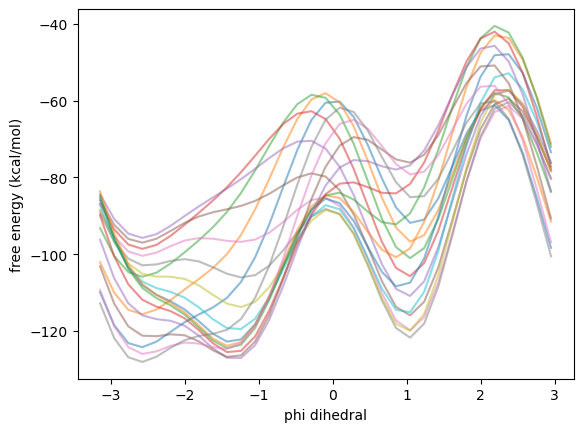

In [16]:
meta_hill = np.loadtxt('../Inputs/dialaA/metad_hill_A_all_2D.dat', comments='#')
# plt.plot(meta_hill[:,0], meta_hill[:,2], alpha=0.5, label='bias factor=1')
for i in range(int(meta_hill.shape[0] / 33)):
    plt.plot(meta_hill[i*33:(i+1)*33,0], meta_hill[i*33:(i+1)*33,2], alpha=0.5, label='bias factor=1')
plt.xlabel('phi dihedral')
plt.ylabel('free energy (kcal/mol)')

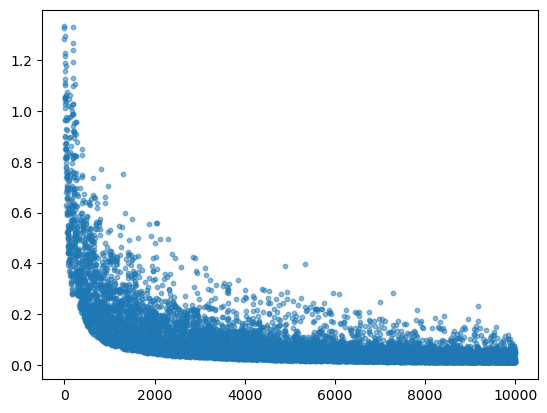

In [7]:
meta_grid = np.loadtxt('../Inputs/dialaA/HILLS_2D', comments='#')
plt.scatter(meta_grid[:, 0], meta_grid[:, 5], alpha=0.5, s=10)

Text(0.5, 0, 'Time (ps)')

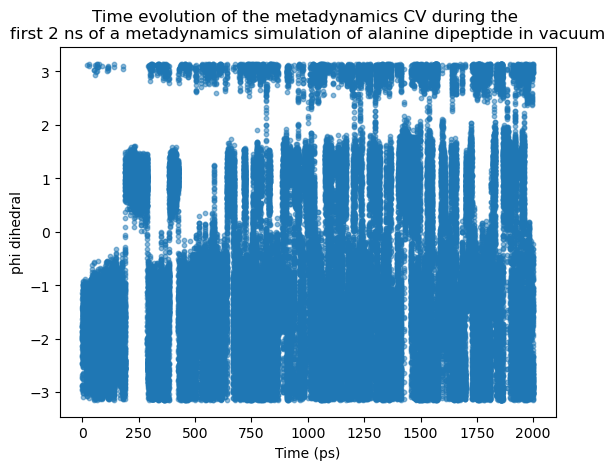

In [8]:
meta_grid = np.loadtxt('../Inputs/dialaA/metad_COLVAR_2D_A',
                       comments='#')
time = meta_grid[:, 0]
time = time[time < 2000]
phi = meta_grid[:, 1]
phi = phi[:len(time)]
# plot time < 2ns the change of phi
plt.figure()
plt.scatter(time, phi, alpha=0.5, s=10)
plt.title('Time evolution of the metadynamics CV during the \n'
          'first 2 ns of a metadynamics simulation of alanine dipeptide in vacuum')
plt.ylabel('phi dihedral')
plt.xlabel('Time (ps)')

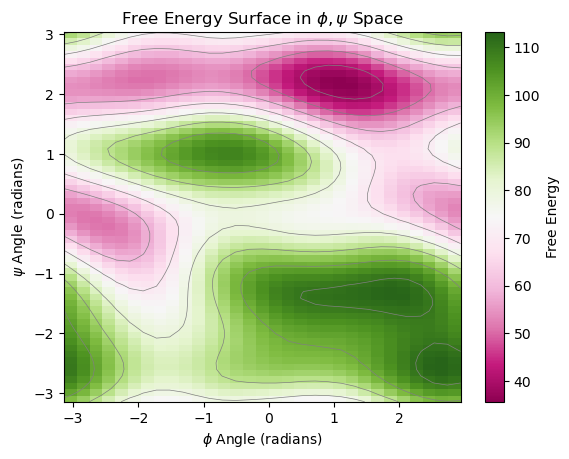

In [14]:
def plot_potential_surface(data):

    unique_phi = np.unique(data[:, 0])
    unique_psi = np.unique(data[:, 1])
    
    surface = np.empty((len(unique_phi), len(unique_psi)))

    for row in data:
        phi_idx = np.where(unique_phi == row[0])[0][0]
        psi_idx = np.where(unique_psi == row[1])[0][0]
        surface[phi_idx, psi_idx] = row[2]

    plt.imshow(surface, origin='lower', aspect='auto', cmap='PiYG',
               extent=[unique_psi.min(), unique_psi.max(),
                       unique_phi.min(), unique_phi.max()])
    plt.colorbar(label='Free Energy')
    CS = plt.contour(unique_psi, unique_phi, surface, colors='grey', linewidths=0.5)
    plt.xlabel(r'$\phi$ Angle (radians)')
    plt.ylabel(r'$\psi$ Angle (radians)')
    plt.title(r'Free Energy Surface in $\phi, \psi$ Space')

data = np.loadtxt('../Inputs/dialaA/metad_2D_A.grid.dat',comments=['#'])
plot_potential_surface(data)
plt.savefig('../Figures/problem6_FES.png', dpi=300)

In [24]:
import imageio
import os

def plot_surface(data, filename):
    unique_phi = np.unique(data[:, 0])
    unique_psi = np.unique(data[:, 1])
    
    surface = np.empty((len(unique_phi), len(unique_psi)))

    for row in data:
        phi_idx = np.where(unique_phi == row[0])[0][0]
        psi_idx = np.where(unique_psi == row[1])[0][0]
        surface[phi_idx, psi_idx] = row[2]

    plt.imshow(surface, origin='lower', aspect='auto', cmap='PiYG',
               extent=[unique_psi.min(), unique_psi.max(),
                       unique_phi.min(), unique_phi.max()])
    plt.colorbar(label='Free Energy')
    CS = plt.contour(unique_psi, unique_phi, surface, colors='grey', linewidths=0.5)
    plt.xlabel(r'$\phi$ Angle (radians)')
    plt.ylabel(r'$\psi$ Angle (radians)')
    plt.title(r'Free Energy Surface in $\phi, \psi$ Space')
    
    plt.savefig(filename)
    plt.close()

def create_gif_from_surfaces(surfaces_data, gif_name):
    filenames = []

    for idx, data in enumerate(surfaces_data):
        filename = f"../Figures/problem6_FES_{idx}.png"
        plot_surface(data, filename)
        filenames.append(filename)

    images = [imageio.imread(filename) for filename in filenames]
    imageio.mimsave(gif_name, images, duration=0.5)

    for filename in filenames:
        os.remove(filename)

In [25]:
data = []
for i in range(101):
    hill = np.loadtxt(f'../Inputs/dialaA/metad_hill_2D.dat{i}.dat',comments=['#'])
    data.append(hill)
create_gif_from_surfaces(data, '../Figures/problem6_FES.gif')